In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/AWT_export_1.csv')

Mounted at /content/drive


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481085 entries, 0 to 481084
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   t                     481085 non-null  object 
 1   executionId           481085 non-null  object 
 2   ds_display_type       481085 non-null  int64  
 3   ds_display_size       481085 non-null  int64  
 4   ds_vendor_model       481085 non-null  int64  
 5   streamingSessionID    481085 non-null  object 
 6   gs_dsName             481085 non-null  object 
 7   gs_rts                481085 non-null  int64  
 8   gs_power_W            481085 non-null  int64  
 9   gs_consumption_Wh     481085 non-null  int64  
 10  gs_voltage_V          481085 non-null  float64
 11  gs_current_mA         481085 non-null  int64  
 12  gs_phase_deg          481085 non-null  float64
 13  gs_power_factor       481085 non-null  float64
 14  jobName               481085 non-null  object 
 15  

In [3]:
unique_counts = df.nunique()
print(unique_counts)

t                       122274
executionId                  8
ds_display_type              3
ds_display_size              3
ds_vendor_model              4
streamingSessionID        1600
gs_dsName                    1
gs_rts                  240895
gs_power_W                 282
gs_consumption_Wh         5363
gs_voltage_V               222
gs_current_mA             1156
gs_phase_deg              1805
gs_power_factor             56
jobName                      8
stream                       4
app_config_greenview         5
ds_setting_ecomode           2
dtype: int64


In [4]:
print(df.isnull().sum()) # check whether there is empty data

t                       0
executionId             0
ds_display_type         0
ds_display_size         0
ds_vendor_model         0
streamingSessionID      0
gs_dsName               0
gs_rts                  0
gs_power_W              0
gs_consumption_Wh       0
gs_voltage_V            0
gs_current_mA           0
gs_phase_deg            0
gs_power_factor         0
jobName                 0
stream                  0
app_config_greenview    0
ds_setting_ecomode      0
dtype: int64


In [5]:
# transfer data type of t
df['t'] = pd.to_datetime(df['t'])
df['hour'] = df['t'].dt.hour
df['minute'] = df['t'].dt.minute
df['day_of_week'] = df['t'].dt.dayofweek
df['month'] = df['t'].dt.month
df = df.drop(columns=['t'])  # delete the former t
df['hour'] = df['hour'].astype('int64')
df['minute'] = df['minute'].astype('int64')
df['day_of_week'] = df['day_of_week'].astype('int64')
df['month'] = df['month'].astype('int64')

print(df.dtypes)


executionId              object
ds_display_type           int64
ds_display_size           int64
ds_vendor_model           int64
streamingSessionID       object
gs_dsName                object
gs_rts                    int64
gs_power_W                int64
gs_consumption_Wh         int64
gs_voltage_V            float64
gs_current_mA             int64
gs_phase_deg            float64
gs_power_factor         float64
jobName                  object
stream                   object
app_config_greenview      int64
ds_setting_ecomode         bool
hour                      int64
minute                    int64
day_of_week               int64
month                     int64
dtype: object


In [6]:
df_numeric = df.select_dtypes(exclude='object')
df_numeric.var()


,0
ds_display_type,6.873983e-01
ds_display_size,2.868198e+01
ds_vendor_model,1.250133e+00
gs_rts,7.539387e+09
gs_power_W,1.519813e+03
gs_consumption_Wh,4.159326e+06
gs_voltage_V,1.014461e+00
gs_current_mA,2.931190e+04
gs_phase_deg,1.049524e+02
gs_power_factor,3.987134e-03


In [7]:
# specify columns list

X = df.drop(columns = ['gs_consumption_Wh']) # exclude label column
y = df['gs_consumption_Wh'] # specify label column
print(X.columns)

Index(['executionId', 'ds_display_type', 'ds_display_size', 'ds_vendor_model',
       'streamingSessionID', 'gs_dsName', 'gs_rts', 'gs_power_W',
       'gs_voltage_V', 'gs_current_mA', 'gs_phase_deg', 'gs_power_factor',
       'jobName', 'stream', 'app_config_greenview', 'ds_setting_ecomode',
       'hour', 'minute', 'day_of_week', 'month'],
      dtype='object')


In [8]:
!pip uninstall scikit-learn xgboost category-encoders -y
!pip install scikit-learn==1.2.2 xgboost==1.7.6 category-encoders==2.5.1

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Successfully uninstalled xgboost-2.1.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
df["gs_power_W_rolling_mean"] = df["gs_power_W"].rolling(window=3).mean()
df["gs_power_W_rolling_mean"] = df["gs_power_W_rolling_mean"].fillna(method='bfill')

# Interaction: voltage * current (mA to A)
df["voltage_current"] = df["gs_voltage_V"] * (df["gs_current_mA"] / 1000)

df["voltage_current_power"] = (df["gs_voltage_V"] * (df["gs_current_mA"] / 1000)) * df["gs_power_factor"]


df["avg_power_per_vendor"] = df.groupby("ds_vendor_model")["gs_power_W"].transform("max")


df['normalized_power'] = df["gs_power_W"] / df["avg_power_per_vendor"]


df["power_diff"] = df["gs_power_W"] - df["voltage_current_power"]


<ipython-input-9-ae56c5dee56b>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["gs_power_W_rolling_mean"] = df["gs_power_W_rolling_mean"].fillna(method='bfill')


In [10]:
import pandas as pd
from category_encoders import TargetEncoder

# boolean type transfer
df['ds_setting_ecomode'] = df['ds_setting_ecomode'].astype(int)

#  executionId stream one hot encoding
df = pd.get_dummies(df, columns=['executionId', 'stream'], drop_first=True, dtype=int)

# check types of df
print("data types of df：")
print(df.dtypes)


# select numeric features
X_numeric = X.select_dtypes(include=['int64', 'float64'])

#  X_numeric column
print("X_numeric columns：")
print(X_numeric.columns)

# calculate pearson correlation
correlation = X_numeric.corrwith(y).abs().sort_values(ascending=False)
print("correlations：")
print(correlation)

data types of df：
ds_display_type                                                                                                      int64
ds_display_size                                                                                                      int64
ds_vendor_model                                                                                                      int64
streamingSessionID                                                                                                  object
gs_dsName                                                                                                           object
gs_rts                                                                                                               int64
gs_power_W                                                                                                           int64
gs_consumption_Wh                                                                                                    int6

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                      ds_display_type  ds_display_size  ds_vendor_model  \
ds_display_type              1.000000         0.464404         0.134850   
ds_display_size              0.464404         1.000000         0.772310   
ds_vendor_model              0.134850         0.772310         1.000000   
gs_rts                       0.004988         0.004110         0.009360   
gs_power_W                   0.389888         0.636865         0.310638   
gs_voltage_V                -0.000673        -0.000453         0.000103   
gs_current_mA                0.404122         0.607068         0.268168   
gs_phase_deg                 0.408614         0.911628         0.667439   
gs_power_factor              0.234792         0.752271         0.513582   
app_config_greenview         0.000070         0.000022        -0.000061   
hour                        -0.000642        -0.000337        -0.000014   
minute                      -0.000013        -0.000088        -0.000119   
day_of_week              

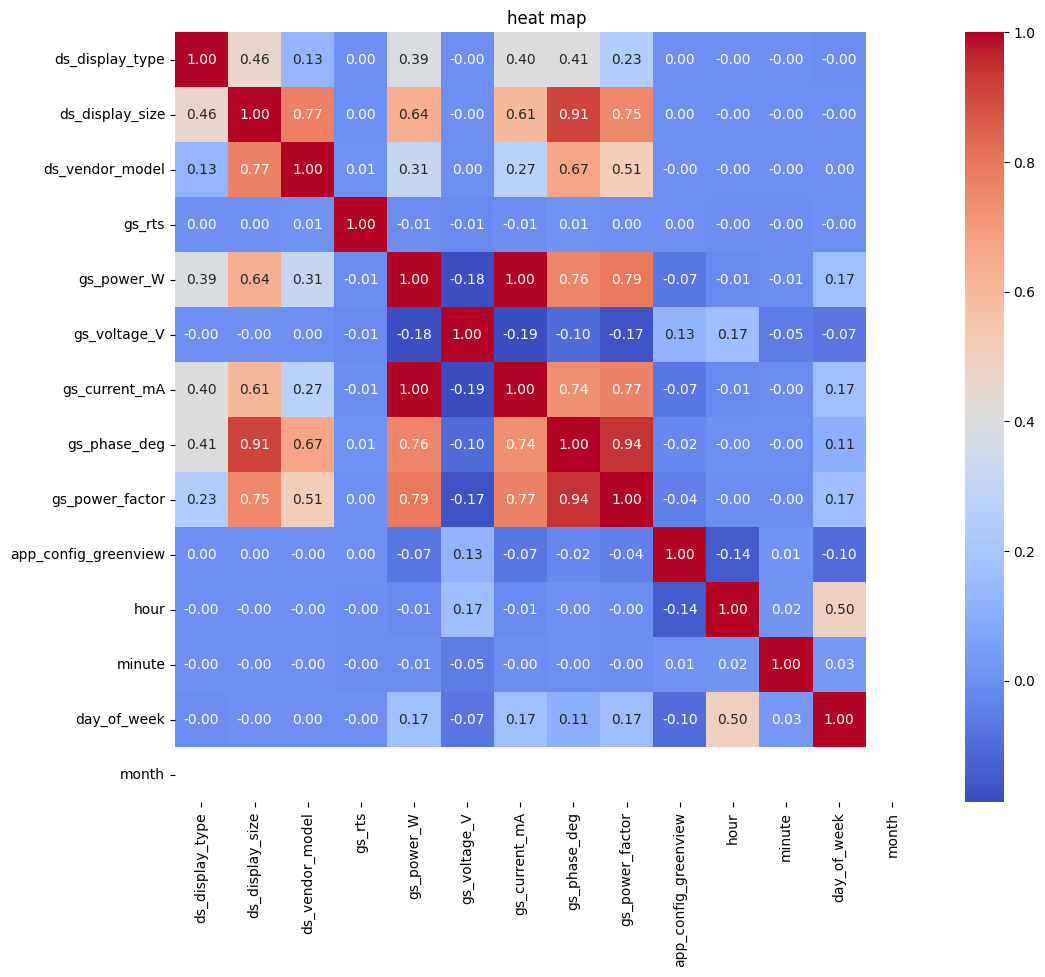

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_numeric.corr()
print(correlation_matrix)
low_variance_features = X_numeric.var()[X_numeric.var() < 0.01].index
print("Low variance features:", low_variance_features)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("heat map")
plt.show()

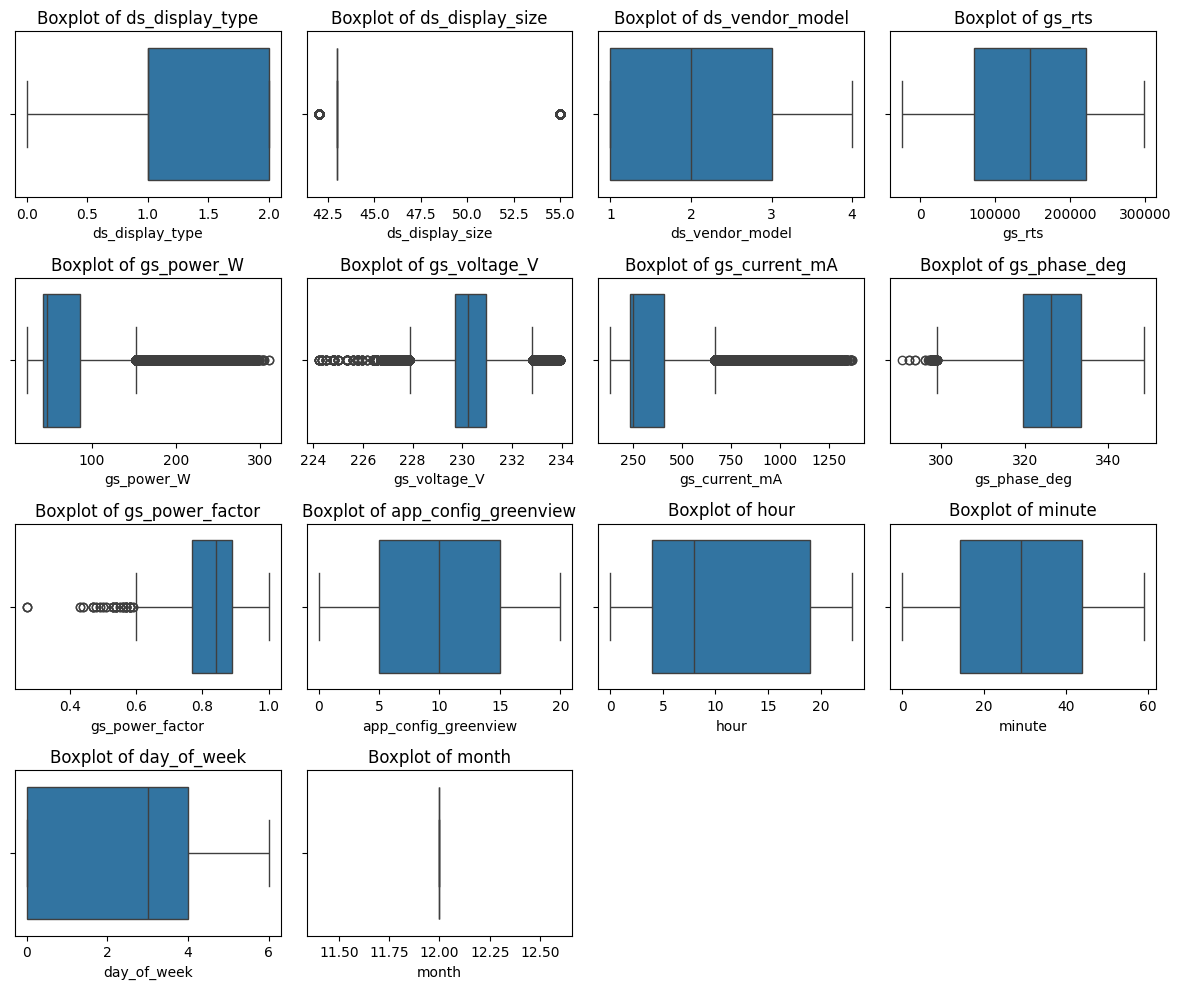

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols, 1):
  plt.subplot(4, 4, i)
  sns.boxplot(x=X[col])
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

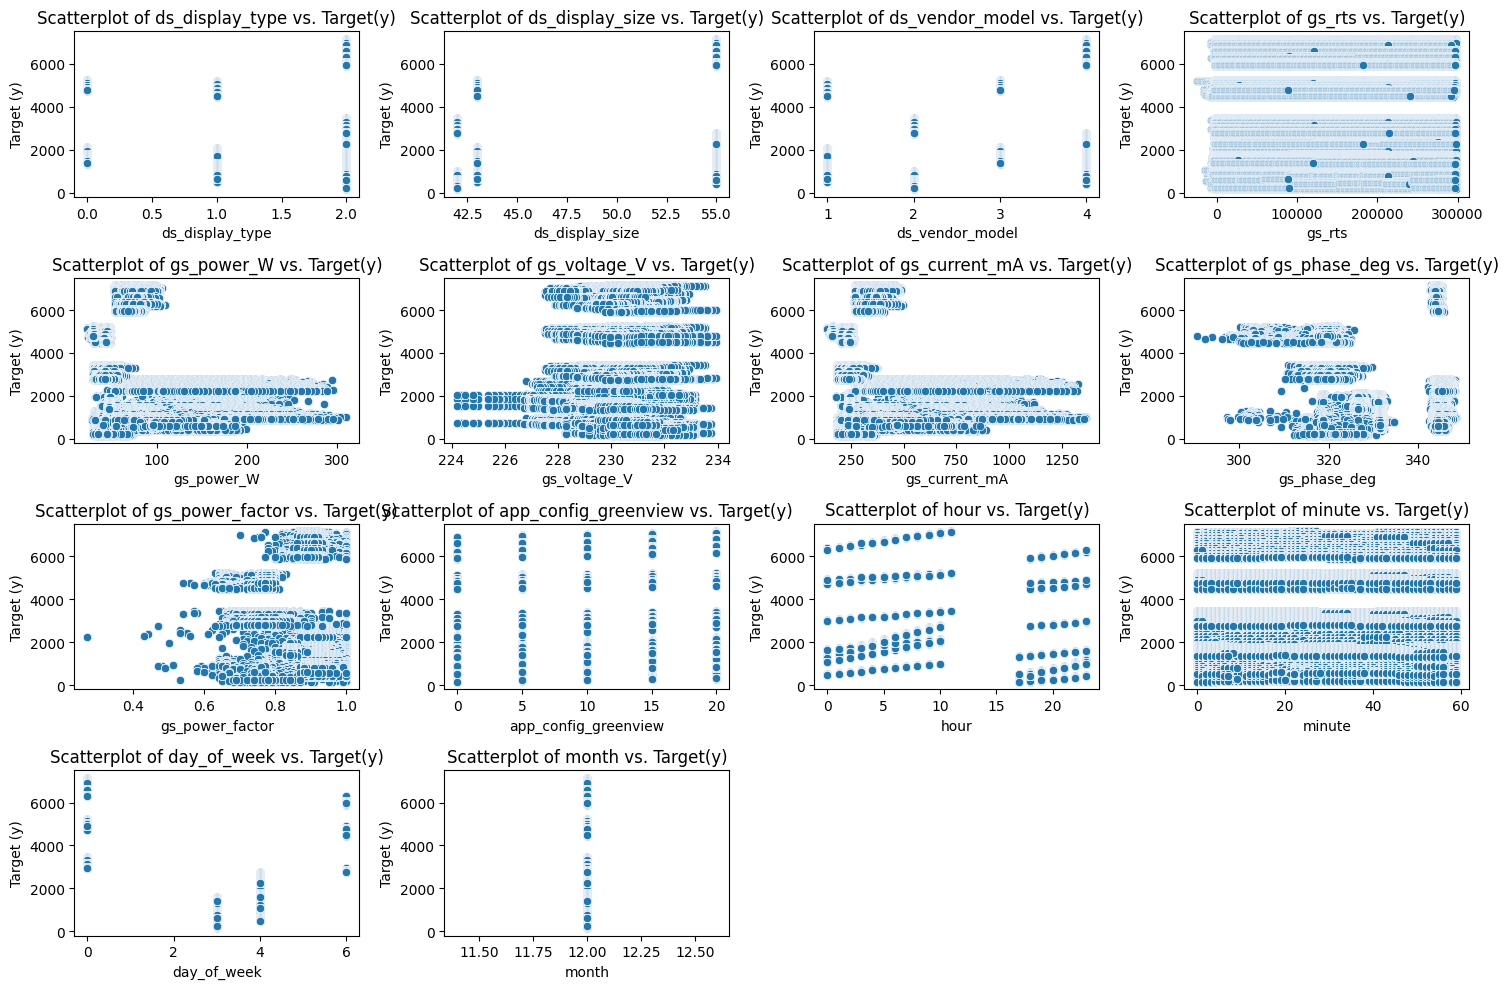

In [13]:
plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols,1):
  plt.subplot(4,4,i)
  plt.subplots_adjust(hspace=0.4, wspace=2)
  sns.scatterplot(x=X[col], y=y)
  plt.title(f'Scatterplot of {col} vs. Target(y)')
  plt.xlabel(col)
  plt.ylabel("Target (y)")

plt.tight_layout()
plt.show()

<Figure size 900x800 with 0 Axes>

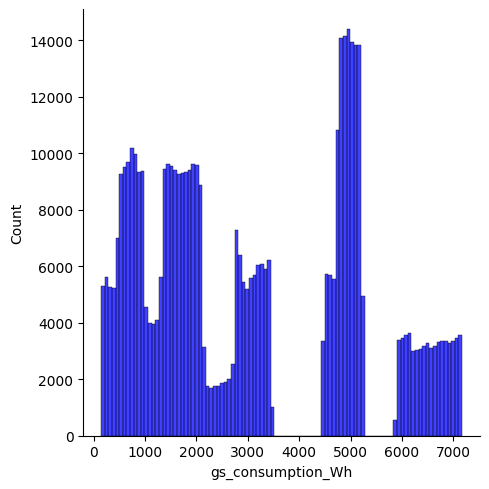

In [14]:

plt.figure(figsize=(9, 8))
sns.displot(df['gs_consumption_Wh'], color='b', bins=100)

In [15]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# excluding the target variable
X = df.drop('gs_consumption_Wh', axis=1)
y = df['gs_consumption_Wh']

# split data into traing and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# select numeric cols from training set
numeric_cols = X_train.select_dtypes(include=['float64','int64']).columns

# save x numeric in train and test separately
X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

# scale：only fit in training data, transform test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# PCA
pca = PCA(n_components=0.95)  # 95%
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


print("numerical columns：", numeric_cols)
print("Principal Components：")
print(pca.components_)

numerical columns： Index(['ds_display_type', 'ds_display_size', 'ds_vendor_model', 'gs_rts',
       'gs_power_W', 'gs_voltage_V', 'gs_current_mA', 'gs_phase_deg',
       'gs_power_factor', 'app_config_greenview', 'ds_setting_ecomode', 'hour',
       'minute', 'day_of_week', 'month', 'gs_power_W_rolling_mean',
       'voltage_current', 'voltage_current_power', 'avg_power_per_vendor',
       'normalized_power', 'power_diff',
       'executionId_0729a212-362f-424f-b746-0bf4ebca08a8',
       'executionId_203aa095-ed1a-4800-aad0-5eb465f8ce5f',
       'executionId_319bdec7-39f0-4e21-8ee8-7bcd09ae62b0',
       'executionId_3934e530-37ae-49f4-a23a-c87d5788a6ed',
       'executionId_4db2a768-b467-4d6b-bd68-5a333d3bd8f1',
       'executionId_9051e59b-28c8-4a52-93cb-aba90650b18c',
       'executionId_98434dca-0da4-419b-8715-3dcb12b4f895',
       'stream_https://refcontent.s3.eu-central-1.amazonaws.com/ref_content/mws/Soccer_GER_NED_RBB_HEVC.mp4',
       'stream_https://refcontent.s3.eu-central-1.

In [ ]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

from google.colab import files
files.download('scaler.pkl')
files.download('pca.pkl')

In [33]:
pca_kept_features = numeric_cols[:pca.n_components_]

removed_features = set(numeric_cols) - set(pca_kept_features)

print("Features removed by PCA:\n" + "\n".join(sorted(removed_features)))
print("Features kept by PCA:\n" +"\n".join(sorted(pca_kept_features)))


Features removed by PCA:
avg_power_per_vendor
executionId_0729a212-362f-424f-b746-0bf4ebca08a8
executionId_203aa095-ed1a-4800-aad0-5eb465f8ce5f
executionId_319bdec7-39f0-4e21-8ee8-7bcd09ae62b0
executionId_3934e530-37ae-49f4-a23a-c87d5788a6ed
executionId_4db2a768-b467-4d6b-bd68-5a333d3bd8f1
executionId_9051e59b-28c8-4a52-93cb-aba90650b18c
executionId_98434dca-0da4-419b-8715-3dcb12b4f895
gs_power_W_rolling_mean
month
normalized_power
power_diff
stream_https://refcontent.s3.eu-central-1.amazonaws.com/ref_content/mws/Soccer_GER_NED_RBB_HEVC.mp4
stream_https://refcontent.s3.eu-central-1.amazonaws.com/ref_content/mws/Tatort_RBB_HEVC.mp4
stream_https://refcontent.s3.eu-central-1.amazonaws.com/ref_content/timescapes/timescapes_1920x1080_25_5000.mp4
voltage_current
voltage_current_power
Features kept by PCA:
app_config_greenview
day_of_week
ds_display_size
ds_display_type
ds_setting_ecomode
ds_vendor_model
gs_current_mA
gs_phase_deg
gs_power_W
gs_power_factor
gs_rts
gs_voltage_V
hour
minute


In [16]:
import sklearn
import xgboost
from xgboost.sklearn import XGBRegressor
print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

Scikit-learn version: 1.2.2
XGBoost version: 1.7.6


In [17]:
import torch
print(torch.cuda.is_available())

True


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

# using random search to tune parameters
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'n_estimators': [200, 400, 600],
    'subsample': [0.6, 0.8],
    'colsample_bytree':[0.6, 0.8],
    'lambda': [0.1, 1, 10, 100],
    'alpha': [0.1, 1, 10, 100],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3]
}

# initiate the regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist') # booster = gbtree by default

# perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=xgb_model,
                                    param_distributions=param_dist,
                                    n_iter=50,
                                    scoring='neg_mean_squared_error',
                                    cv=4,
                                    verbose=1,
                                    random_state=123
                                    )


# fit randomized_mse to the data
randomized_mse.fit(X_train_pca, y_train)

# print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))



Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found:  {'subsample': 0.6, 'n_estimators': 600, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 0.1, 'gamma': 1, 'colsample_bytree': 0.8, 'alpha': 100}
Lowest RMSE found:  20.397520528929885


In [19]:
best_model = randomized_mse.best_estimator_
best_model.fit(X_train_pca, y_train)

y_pred = best_model.predict(X_test_pca)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)



Test RMSE: 19.921094197020707


In [21]:
from xgboost import to_graphviz

tree_graph = to_graphviz(best_model, num_trees=0)
tree_graph.render("xgboost_tree")  #  xgboost_tree.pdf
tree_graph.view()

'xgboost_tree.pdf'

In [22]:
from google.colab import files
files.download("xgboost_tree.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# save best model

# save model in colab
best_model.save_model(best_model, "best_xgb_model.model")

# download model
from google.colab import files
files.download("best_xgb_model.model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

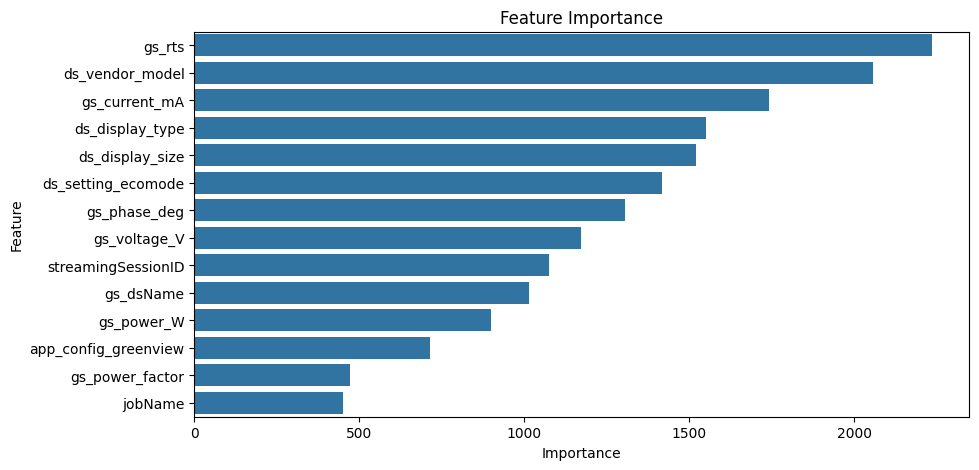

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get feature importance
importance = best_model.get_booster().get_score(importance_type='weight')

# get column name
feature_names = X_train.columns

# transfer feature number to column name
importance_df = pd.DataFrame(
    {'Feature': [feature_names[int(f[1:])] for f in importance.keys()],
     'Importance': importance.values()}
).sort_values(by="Importance", ascending=False)

# plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance")
plt.show()


In [25]:
pip install shap

100%|===================| 9989/10000 [04:07<00:00]       

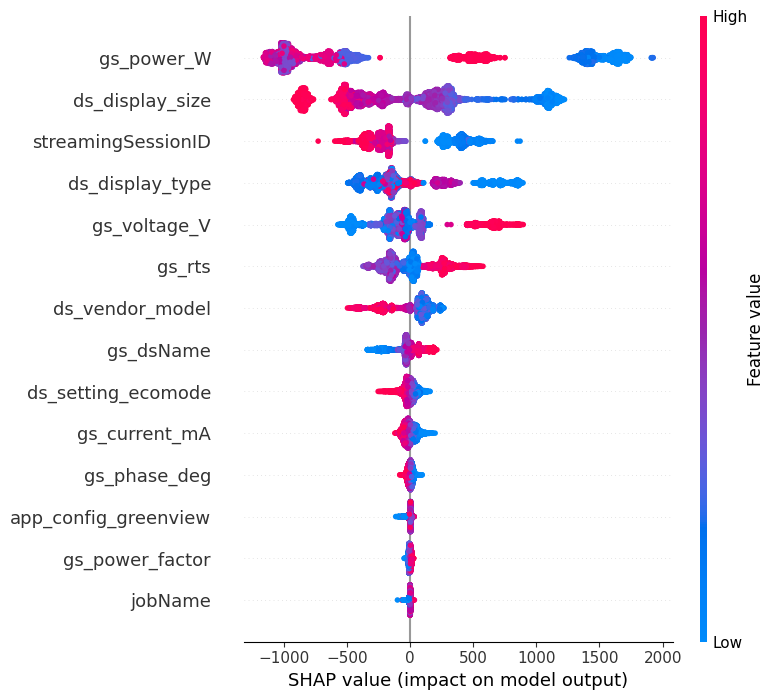

In [26]:
import shap
import numpy as np
import pandas as pd  # Import pandas
import matplotlib.pyplot as plt
import seaborn as sns

# avoid large calculation
# Convert X_train_pca back to a DataFrame
X_sample_df = pd.DataFrame(X_train_pca)
X_sample = X_sample_df.sample(10000, random_state=123)

# create shap explainer
explainer = shap.Explainer(best_model, X_sample)

# calculate shap
shap_values = explainer(X_sample)

# plot feature importance
# The change is on this line:
shap.summary_plot(shap_values, X_sample, feature_names=X_train.columns) # Use X_train.columns instead of X_train_pca.columns


In [29]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy = DummyRegressor(strategy="mean") # predict y only using mean y variables
dummy.fit(X, y)
y_pred_baseline = dummy.predict(X)
baseline_rmse = mean_squared_error(y, y_pred_baseline, squared=False)

print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 2039.4403679765362


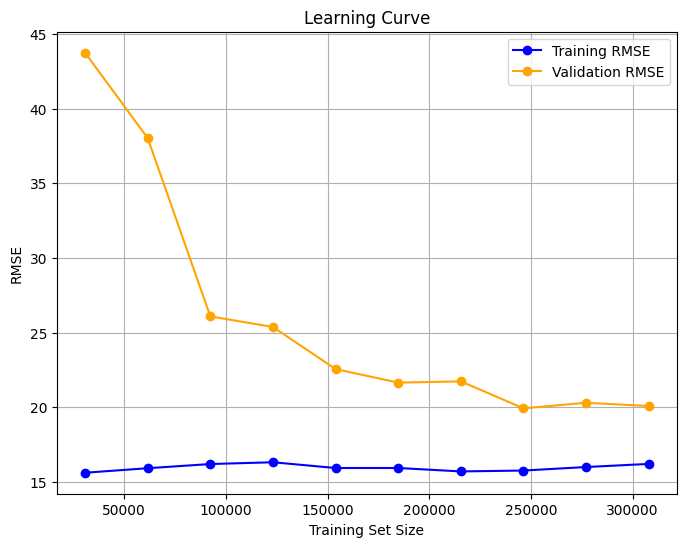

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X_used = X_train_pca
y_used = y_train

# learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_used, y_used, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# RMSE
train_rmse = np.sqrt(np.abs(train_scores.mean(axis=1)))
test_rmse = np.sqrt(np.abs(test_scores.mean(axis=1)))


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='o', color='blue')
plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o', color='orange')

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()
